### Biodata Learner
- Arsyadana Estu
- Gmail : archiseino@gmail.com

## Doing Label Encoding for Categorical data, I don't know much about this, but shall explore

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

---
Dataset berasal dari [kaggle](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data), yang berisi tentang data penyakit kardiovaskular.

Data di unggah melalui github untuk keperluan untuk download menggunakan `wget`

In [1]:
## Get the Dataset using github.
# !wget https://raw.githubusercontent.com/archiseino/Dicoding---Basic-ML/refs/heads/main/cardio_dataset.csv

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
## Numpy and Pandas for Data Operation
import numpy as np
import pandas as pd

## Plotting Graph
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Sklearn K-Means Algo
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import silhouette_score

## Labeling Cluster
from sklearn.preprocessing import LabelEncoder as le
from sklearn.decomposition import PCA
from scipy.spatial import distance

## Scaling Features
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

## K-Medoids (Since K-Means is not enough)
# !pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

## Check the Optimal Cluster
from yellowbrick.cluster import KElbowVisualizer


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
## Load the Dataset
data = pd.read_csv("cardio_dataset.csv")

## Identify Numerical and Categorical Columns
numerical_cols = ['height', 'weight', 'ap_hi', 'ap_lo', 'age_years']
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
numerical_data = data[numerical_cols]
categorical_data = data[categorical_cols]

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

data.head()

Numerical Columns: ['height', 'weight', 'ap_hi', 'ap_lo', 'age_years']
Categorical Columns: Index(['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'], dtype='object')


,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years
0,0,Male,168,62.0,110,80,Normal,Normal,No,No,Yes,50
1,1,Female,156,85.0,140,90,Well Above Normal,Normal,No,No,Yes,55
2,2,Female,165,64.0,130,70,Well Above Normal,Normal,No,No,No,51
3,3,Male,169,82.0,150,100,Normal,Normal,No,No,Yes,48
4,4,Female,156,56.0,100,60,Normal,Normal,No,No,No,47


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

---
Akan dilihat distribusi dari data numeric serta kategorikal, serta matriks korelasi dari feature numerik.

Bisa dilihat dari grafik distribusi masih terdapat nilai yang belum di standarisasi. serta korelasi matriks yang cukup kurang, solusinya dapat dibuat sebuah feature extraction untuk membuat sebuah feature baru nanti untuk mengurangi korelasi antar variabel.

In [4]:
# # Plotting the distribution of numerical features
# for col in numerical_cols:
#     plt.figure(figsize=(8, 6))
#     sns.histplot(data[col], kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.show()

# # Plotting the distribution of categorical features
# for col in categorical_cols:
#     plt.figure(figsize=(8, 6))
#     data[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
#     plt.title(f'Distribution of {col}')
#     plt.ylabel('')
#     plt.show()

# # Correlation Matrix
# plt.figure(figsize=(12,10))
# cor = numerical_data.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

---
Pengecekan info data, dataset ini berisi 70k baris data dengan tipe non-null sehingga tidak perlu di perhatikan soal missing value, namun masih ada outlier yang perlu di tangani.

In [5]:
## Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   gender       70000 non-null  object 
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  object 
 7   gluc         70000 non-null  object 
 8   smoke        70000 non-null  object 
 9   alco         70000 non-null  object 
 10  active       70000 non-null  object 
 11  age_years    70000 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 6.4+ MB


In [6]:
## Check the Description of the Dataset
data.describe(include="all")

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years
count,70000.000000,70000,70000.000000,70000.000000,70000.000000,70000.000000,70000,70000,70000,70000,70000,70000.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,3,2,2,2,NaN
top,NaN,Female,NaN,NaN,NaN,NaN,Normal,Normal,No,No,Yes,NaN
freq,NaN,45530,NaN,NaN,NaN,NaN,52385,59479,63831,66236,56261,NaN
mean,49972.419900,NaN,164.359229,74.205690,128.817286,96.630414,NaN,NaN,NaN,NaN,NaN,52.840671
std,28851.302323,NaN,8.210126,14.395757,154.011419,188.472530,NaN,NaN,NaN,NaN,NaN,6.766774
min,0.000000,NaN,55.000000,10.000000,-150.000000,-70.000000,NaN,NaN,NaN,NaN,NaN,29.000000
25%,25006.750000,NaN,159.000000,65.000000,120.000000,80.000000,NaN,NaN,NaN,NaN,NaN,48.000000
50%,50001.500000,NaN,165.000000,72.000000,120.000000,80.000000,NaN,NaN,NaN,NaN,NaN,53.000000
75%,74889.250000,NaN,170.000000,82.000000,140.000000,90.000000,NaN,NaN,NaN,NaN,NaN,58.000000


In [7]:
## Checking the Missing Value (Even though there are none)
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

Dataset numerik memiliki banyak outlier, metode untuk menanangani ini adalah dengan IQR

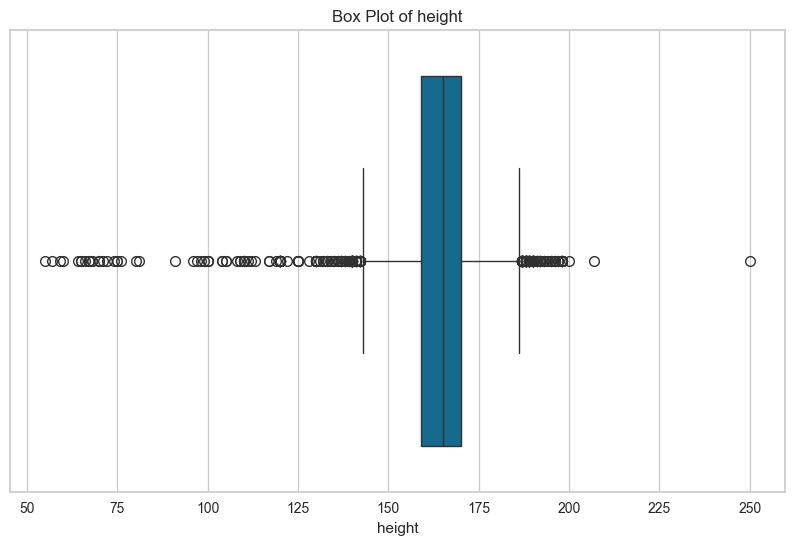

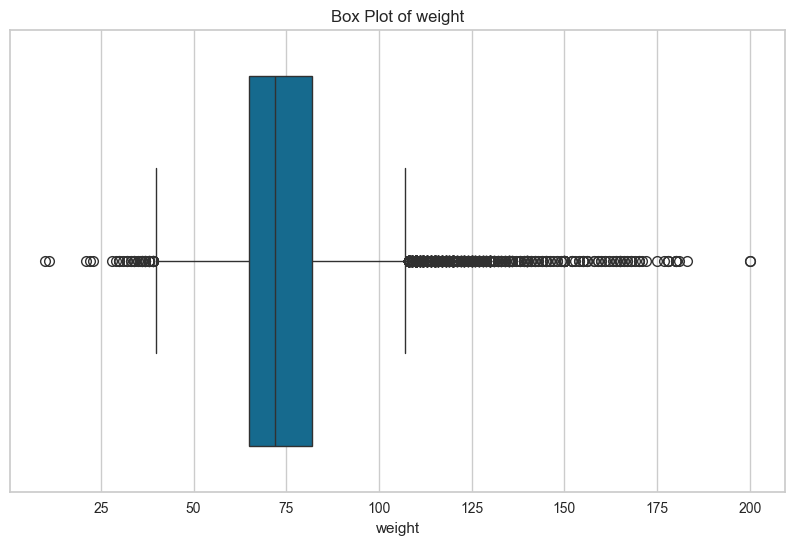

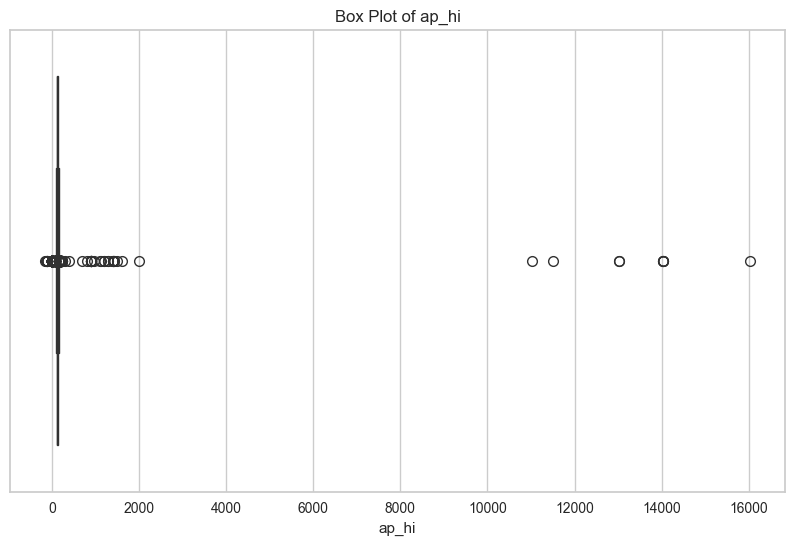

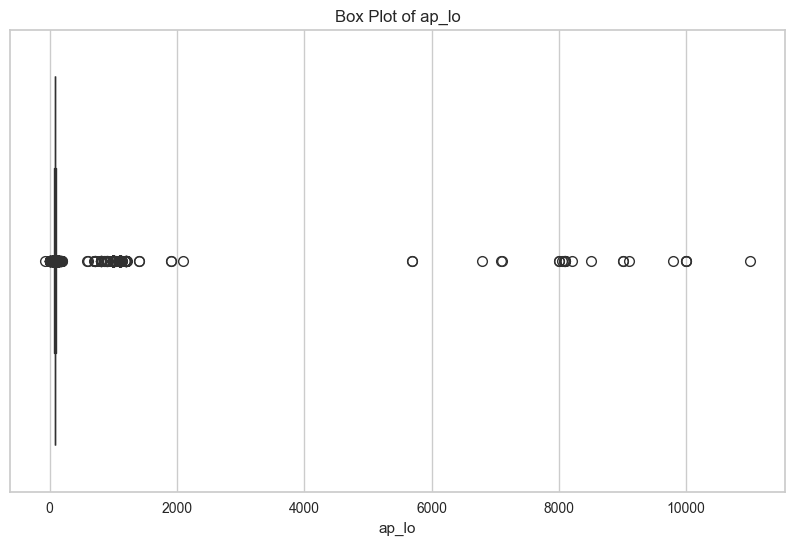

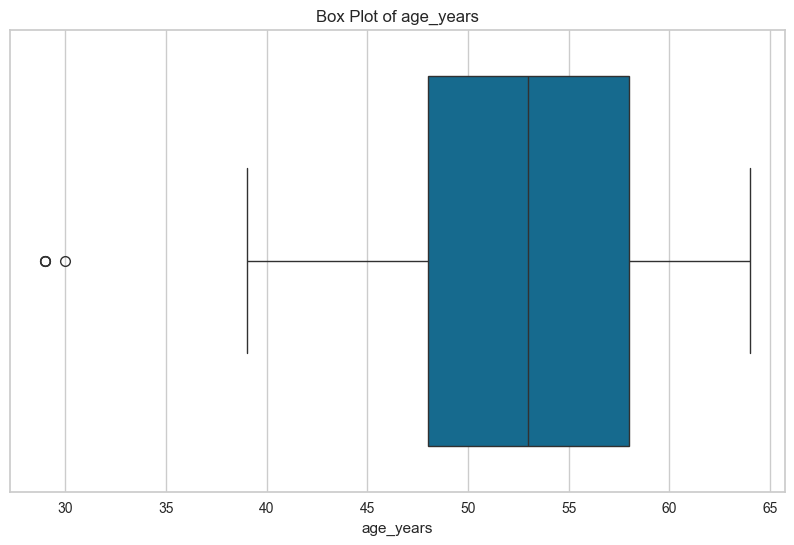

In [8]:
## Checking on the Outlier
numerical_data = data[numerical_cols]
for feature in numerical_data:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=data[feature])
  plt.title(f"Box Plot of {feature}")
  plt.show()

In [9]:
## Identifying the IQR
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

## Identifying the Outlier
outliers = ~((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))).any(axis=1)

## Store the new Data after removing outlier
data = data[outliers]

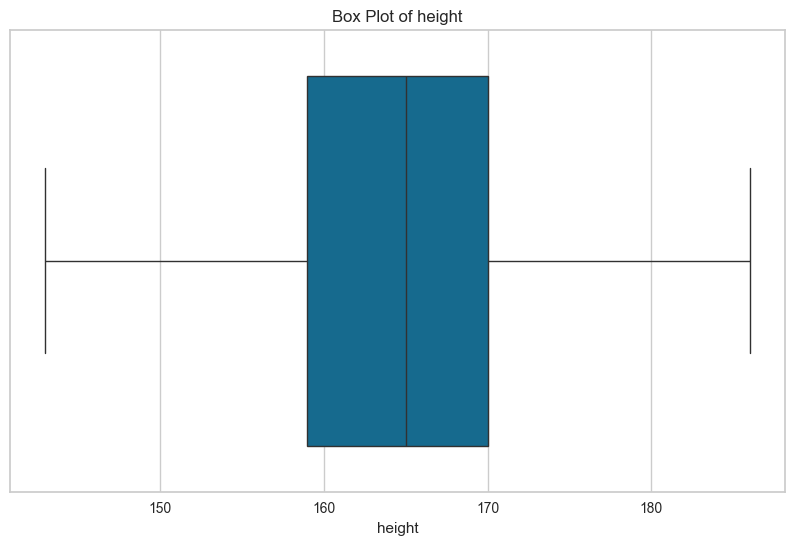

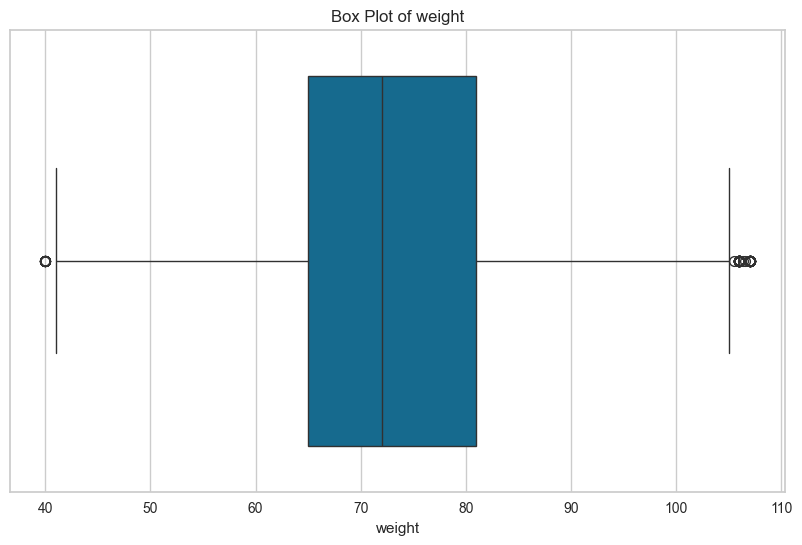

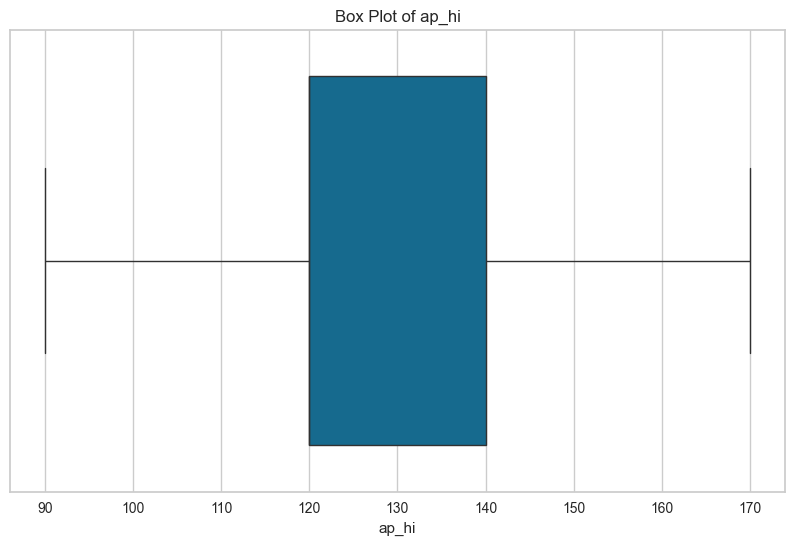

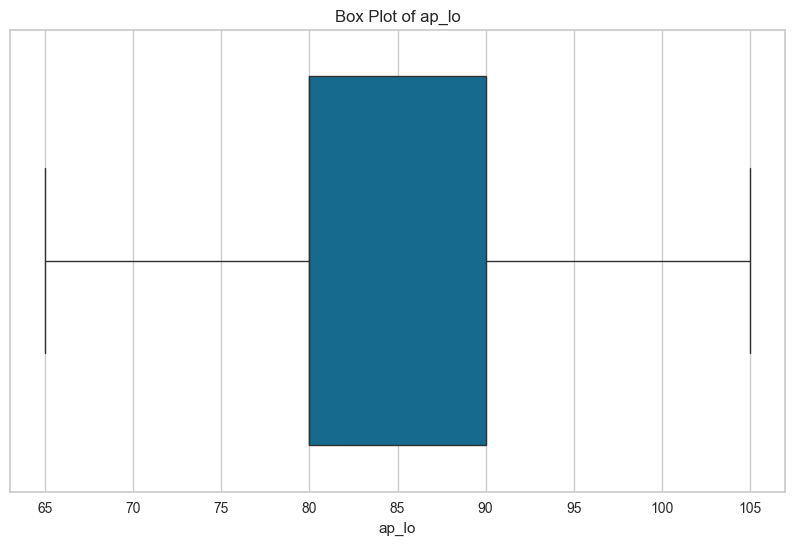

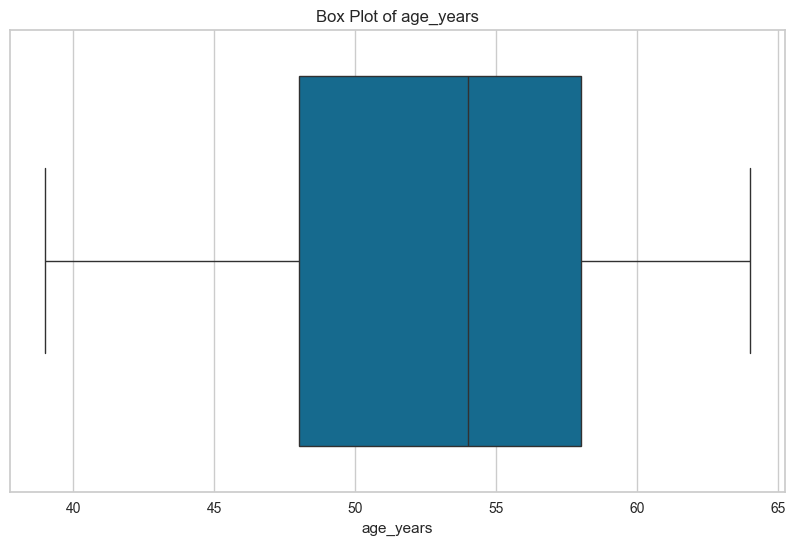

In [10]:
## Checking on the Outlier After IQR
numerical_data = data[numerical_cols]
for feature in numerical_data:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=data[feature])
  plt.title(f"Box Plot of {feature}")
  plt.show()

Penggabungan dataset numeric hasil outlier dengan kategorikal

In [11]:
## Combine cleaned dataset after remove outlier with categorical
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62502 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           62502 non-null  int64  
 1   gender       62502 non-null  object 
 2   height       62502 non-null  int64  
 3   weight       62502 non-null  float64
 4   ap_hi        62502 non-null  int64  
 5   ap_lo        62502 non-null  int64  
 6   cholesterol  62502 non-null  object 
 7   gluc         62502 non-null  object 
 8   smoke        62502 non-null  object 
 9   alco         62502 non-null  object 
 10  active       62502 non-null  object 
 11  age_years    62502 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 6.2+ MB


### Combining Selected Data Numeric and Categorical

In [ ]:
## Label Encoding
le = le()
category_data = data[categorical_cols]

for category in category_data:
    le.predict

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [12]:
## Normalize the data
scaler = StandardScaler()
numerical_data = data[numerical_cols].copy()
numerical_data = scaler.fit_transform(numerical_data)

numerical_data = pd.DataFrame(numerical_data, columns=numerical_cols)
numerical_data.head()

,height,weight,ap_hi,ap_lo,age_years
0,0.477190,-0.911143,-1.149090,-0.221435,-0.431492
1,-1.116157,0.963057,0.950300,1.081779,0.310192
2,0.078853,-0.748169,0.250504,-1.524649,-0.283155
3,0.609969,0.718596,1.650097,2.384993,-0.728165
4,-1.780052,-0.503708,-0.449293,-0.221435,1.051875


In [13]:
## Setup PCA dengan 95 % Variance (5% informasi hilang)
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(numerical_data)

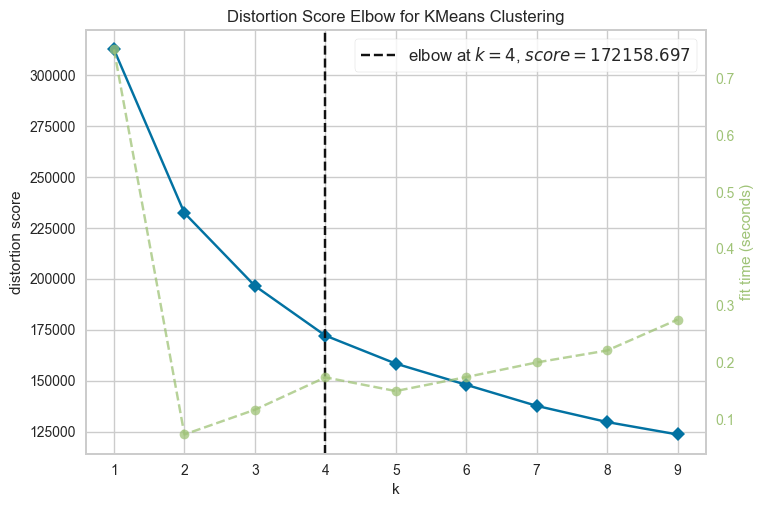

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
## Show the Visualizer Kelbow for optimum cluster number
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(pca_data)
visualizer.show()

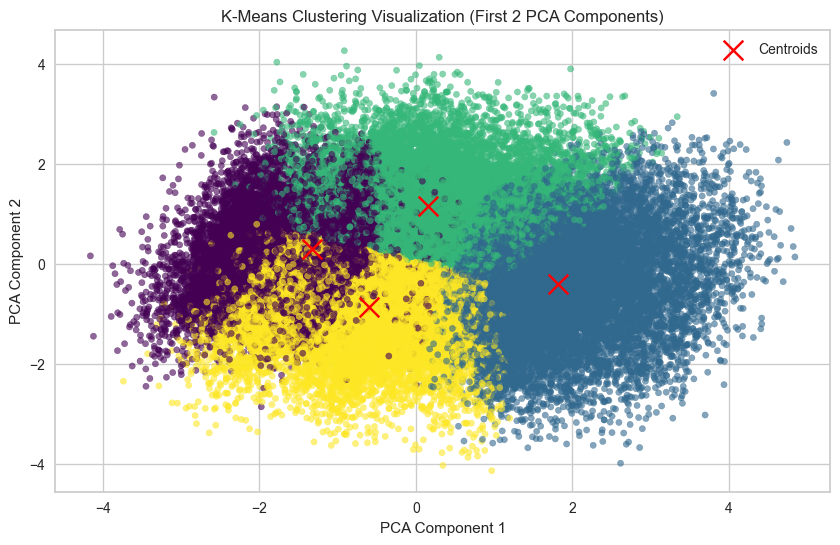

In [15]:
# K-Means clustering with k=3
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(pca_data)

## Visualize PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', s=20, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title("K-Means Clustering Visualization (First 2 PCA Components)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

---
Karena dari dataset yang cukup besar, sifat alami dari dataset ini juga akan menyebar dan membuat kluster sulit untuk di identifikasi karena data saling tumpang tindih.

Pengaruh dari banyaknya feature yang digunakan juga mempengaruhi performa dari kluster itu sendiri.

Data berdimensi tinggi mungkin sulit untuk divisualisasikan dan dikelompokkan secara efektif. Hal ini sering disebut sebagai ***curse of dimensionality***


In [16]:
# Fit KMeans again
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data)  # Use PCA-transformed data

# Calculate silhouette score
silhouette_avg = silhouette_score(pca_data, cluster_labels)
print(f"The average silhouette score is: {silhouette_avg:.4f}")

The average silhouette score is: 0.1934


In [ ]:
## Calculate the Performance per cluster Cluster
wcss = []
silhouette_scores = []
cluster_range = range(2, 10)  # Test for 2 to 9 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(pca_data)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

(wcss, silhouette_scores)

Well, 0.1 - 0.2 silhouette score artinya datanya overlap dan susah untuk membuat kluster.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

---

Akan dilakukan percobaan untuk optimisasi model klustering dengan mencoba feature extraction dan mengubah bagaimana dilakukan proses evaluasi silhouette per batch to increase the silhouette score.

Penggunaan RobustScalar maupun K-Medoids yang lebih robust terhadap outlier maupun noise juga akan membantu meningkatkan nilai dari silhouette score.


In [89]:
# Minimum Score
min_val = 0.55
optimum_val = 0.7
size = 1000

## Copy the data before making changes
data_copy = data.copy()
data_copy.head()


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [90]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [91]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [92]:
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# # Step 1: Filter out extreme outliers in blood pressure
# data_clean = data[(data['ap_hi'] > 80) & (data['ap_hi'] < 200) &
#                   (data['ap_lo'] > 40) & (data['ap_lo'] < 120)]

# # Step 2: Add BMI feature
# data_clean['BMI'] = data_clean['weight'] / ((data_clean['height'] / 100) ** 2)

# # Step 3: Select numerical features for clustering
# numerical_features = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI']
# data_numerical = data_clean[numerical_features]

# # Step 4: Normalize numerical features
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data_numerical)

# # Output cleaned dataset shape and normalized sample
# data_clean.shape, data_scaled[:5]



In [93]:
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# # Step 1: Apply PCA to reduce dimensions while retaining 95% variance
# pca = PCA(n_components=2, random_state=42)
# data_pca = pca.fit_transform(data_scaled)

# # Step 2: Determine optimal number of clusters using silhouette scores
# silhouette_scores = []
# cluster_range = range(2, 10)  # Test for 2 to 9 clusters

# for k in cluster_range:
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
#     cluster_labels = kmeans.fit_predict(data_pca)
#     silhouette_avg = silhouette_score(data_pca, cluster_labels)
#     silhouette_scores.append(silhouette_avg)

# # Step 3: Find the best number of clusters
# best_k = cluster_range[np.argmax(silhouette_scores)]
# best_score = max(silhouette_scores)

# best_k, best_score


In [94]:
# from sklearn.metrics import silhouette_score
# from sklearn.cluster import KMeans
# import numpy as np

# # Step 1: Apply PCA to reduce dimensions while retaining 95% variance
# pca = PCA(n_components=2, random_state=42)
# data_pca = pca.fit_transform(data_scaled)

# def batch_silhouette_score(data, labels, n_batches=10):
#     """
#     Calculate batch-level Silhouette Scores and average them.

#     Parameters:
#     - data: Feature matrix (n_samples, n_features)
#     - labels: Cluster labels for the data
#     - n_batches: Number of batches to divide the data into

#     Returns:
#     - Average Silhouette Score
#     """
#     batch_size = len(data) // n_batches
#     scores = []

#     for i in range(n_batches):
#         start_idx = i * batch_size
#         end_idx = start_idx + batch_size
#         batch_data = data[start_idx:end_idx]
#         batch_labels = labels[start_idx:end_idx]

#         # Ensure batch has more than 1 cluster
#         if len(np.unique(batch_labels)) > 1:
#             score = silhouette_score(batch_data, batch_labels)
#             scores.append(score)

#     return np.mean(scores)

# # Example Usage:
# kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
# cluster_labels = kmeans.fit_predict(data_pca)  # 'data_pca' is PCA-reduced data

# # Compute Silhouette Score in batches
# average_silhouette = batch_silhouette_score(data_pca, cluster_labels, n_batches=5)
# print("Average Silhouette Score (Batched):", average_silhouette)


In [95]:
# ## Initialize KMeans Model
# kmeans = KMeans()

# ## Choose the dataFrame for numerical columns
# # numerical_cols = data[numerical_cols]

# ## Visualizer KElbow for optimum cluster number
# visualizer = KElbowVisualizer(kmeans, k=(1,10))

# ## Fit visualizer with data to find the optimal cluster
# visualizer.fit(data_pca)

# ## Show the graph
# visualizer.show()

In [96]:
# # prompt: Create a K_means clustering with numerical_cols as the numeric feature and reduce the dimension using the PCA and give me the visualization of that.

# import pandas as pd
# import numpy as np
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # Assuming numerical_cols and data are defined from the previous code

# # Step 3: Preprocess Numerical Data
# # numerical_data = data[numerical_cols]
# # scaler = StandardScaler()
# # scaled_numerical_data = scaler.fit_transform(numerical_cols)

# # # Step 4: Dimensionality Reduction with PCA
# # pca = PCA(n_components=0.95)  # Reduce to 2 principal components for visualization
# # pca_result = pca.fit_transform(scaled_numerical_data)

# # Step 5: K-Means Clustering
# kmeans = KMeans(n_clusters=3, random_state=42) # Choose an appropriate number of clusters
# kmeans.fit(data_pca)
# labels = kmeans.labels_

# # Step 6: Visualization
# plt.figure(figsize=(8, 6))
# plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
# plt.title('K-means Clustering with PCA')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar(label='Cluster')
# plt.show()

---

In [97]:
# import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
# import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
# from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
# import seaborn as sns  # Mengimpor pustaka seaborn untuk visualisasi data

# from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
# from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

In [98]:
# ## Initialize KMeans Model
# kmeans = KMeans()

# ## Choose the dataFrame for numerical columns
# numerical_cols = data[numerical_cols]

# ## Visualizer KElbow for optimum cluster number
# visualizer = KElbowVisualizer(kmeans, k=(1,10))

# ## Fit visualizer with data to find the optimal cluster
# visualizer.fit(numerical_cols)

# ## Show the graph
# visualizer.show()

In [99]:
# # prompt: Create a K_means clustering with numerical_cols as the numeric feature and reduce the dimension using the PCA and give me the visualization of that.

# import pandas as pd
# import numpy as np
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # Assuming numerical_cols and data are defined from the previous code

# # Step 3: Preprocess Numerical Data
# # numerical_data = data[numerical_cols]
# scaler = StandardScaler()
# scaled_numerical_data = scaler.fit_transform(numerical_cols)

# # Step 4: Dimensionality Reduction with PCA
# pca = PCA(n_components=0.95)  # Reduce to 2 principal components for visualization
# pca_result = pca.fit_transform(scaled_numerical_data)

# # Step 5: K-Means Clustering
# kmeans = KMeans(n_clusters=3, random_state=42) # Choose an appropriate number of clusters
# kmeans.fit(pca_result)
# labels = kmeans.labels_

# # Step 6: Visualization
# plt.figure(figsize=(8, 6))
# plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
# plt.title('K-means Clustering with PCA')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar(label='Cluster')
# plt.show()

In [100]:
# from sklearn.metrics import silhouette_score
# from sklearn.cluster import KMeans

# # Fit KMeans again
# n_clusters = 4
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# cluster_labels = kmeans.fit_predict(numerical_cols)  # Use PCA-transformed data

# # Calculate silhouette score
# silhouette_avg = silhouette_score(numerical_cols, cluster_labels)
# print(f"The average silhouette score is: {silhouette_avg:.4f}")


In [101]:
#Type your code here

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [102]:
#Type your code here

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [103]:
#Type your code here

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [104]:
#Type your code here

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [105]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [106]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [107]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [108]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.